# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [216]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/carros.csv')

In [217]:
df.head(15)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


- O dataset contém 4345 dados
- Contendo 9 atributos
- Os dados são objeto, float e int

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [219]:
df['Kms/1000'] = df['Mileage/1000'] * 1.6

In [220]:
df = df.drop(columns=['Mileage/1000'])

Dropando as colunas com dados faltantes

In [221]:
df = df.dropna(axis=0)

In [222]:
df.head(5)

,Brand,Price,Body,EngineV,Engine Type,Registration,Year,Model,Kms/1000
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320,443.2
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212,683.2
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500,572.8
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7,384.0
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4,192.0


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Year', ylabel='Price'>

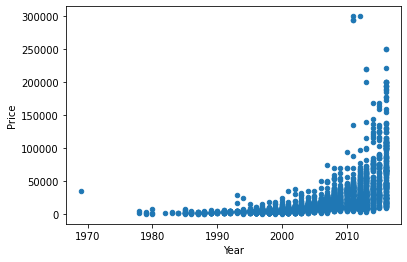

In [ ]:
df.plot.scatter(x='Year',
                   y='Price'
                  )

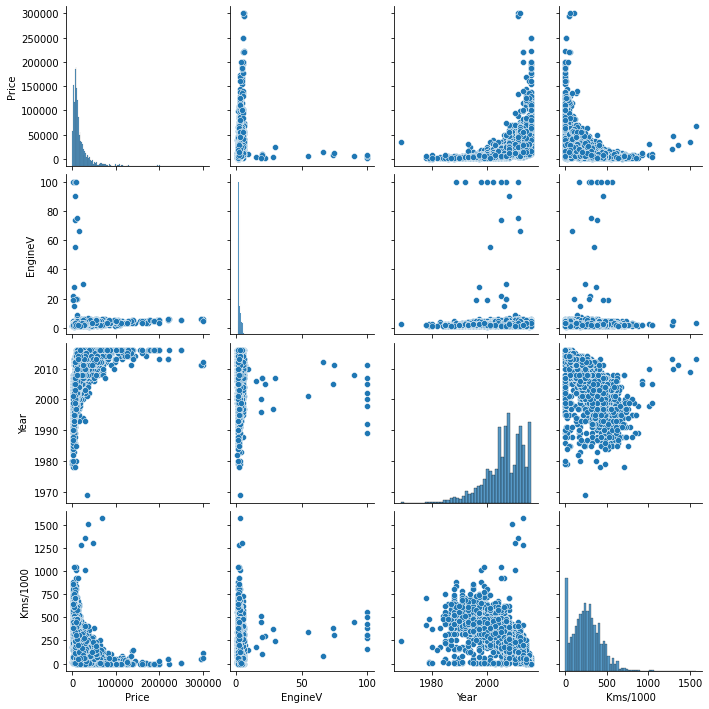

In [ ]:
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'EngineV'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kms/1000'}>]], dtype=object)

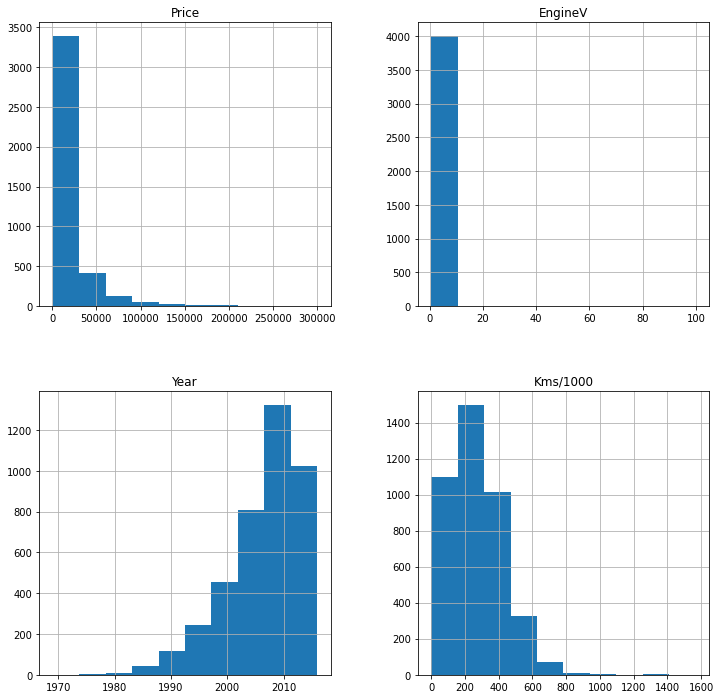

In [ ]:
df.hist(figsize=(12,12))

- É possível observar que há uma correlação entre o preço e o ano dos modelos. 
- Os modelos lançados nos últimos 20 anos são expressivamente mais caros.

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Regressão Linear. Pois com ela é possível fazer uma melhor filtragem de dados.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: Kmeans. Pela melhor visão de dados correlacionados.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão Linear: MAE, MSE e R²

Algoritmo 2: Kmeans

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns=['Brand', 'Body', 'Engine Type','EngineV', 'Registration', 'Model', 'Kms/1000','Price'])
y = df['Price']              

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [225]:
len(x_train), len(x_test), len(y_train), len(y_test)

(3220, 805, 3220, 805)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lr = LinearRegression()

lr.fit(x_train,y_train) 

LinearRegression()

7.1 - Algoritmo 1: (0,5)


In [228]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [229]:
y_predicoes = lr.predict(x_test)

In [230]:
MAE = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes) 
print('MAE: ', MAE)

MAE:  12432.645269457445


In [231]:
MSE = mean_squared_error(y_true = y_test,      
                         y_pred = y_predicoes) 
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  498529219.7388378
raiz MSE:  22327.767907671332


In [232]:
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2: ', R2)  

R2:  0.2545843656393343


7.2 - Algoritmo 2:  (0,5)



In [233]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [234]:
#Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(df[['Year','Price']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df[['Year','Price']])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [244]:
pd.Series(kmeans_labels).value_counts()

3    2691
0     937
2     279
4      92
1      26
dtype: int64

In [245]:
centroides

array([[ 25995.6422412 ,   2010.29669157],
       [212712.07692308,   2014.76923077],
       [ 56915.46164875,   2013.38351254],
       [  8471.5281977 ,   2003.90523969],
       [110144.70652174,   2015.25      ]])

In [235]:
# Lista com a quantidade de clusters
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [246]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(df[['Price','Year']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df[['Price','Year']])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [247]:
df['grupos kmeas'] = kmeans_labels

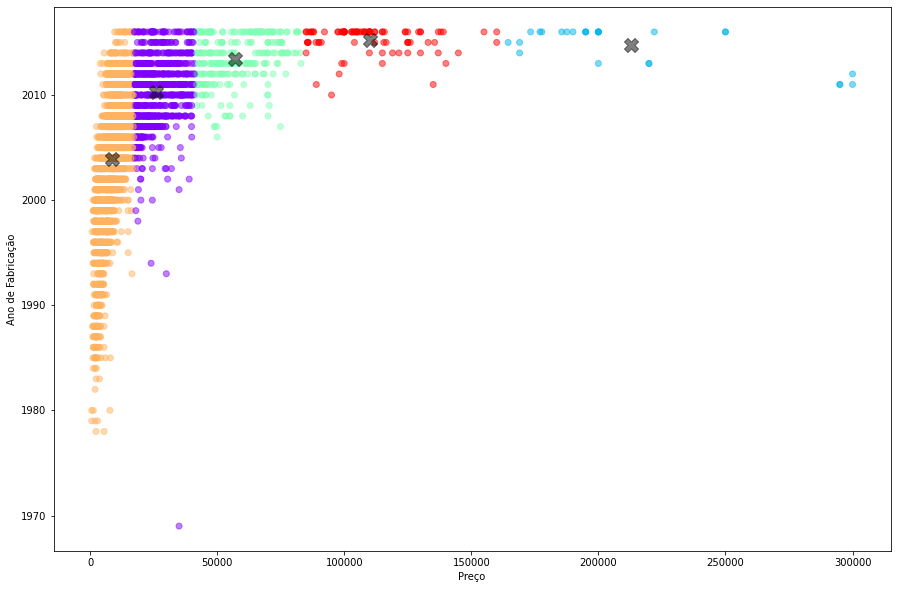

In [249]:
# plotando os dados identificando com os seus clusters
plt.scatter(df[['Price']],df[['Year']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Preço')
plt.ylabel('Ano de Fabricação')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

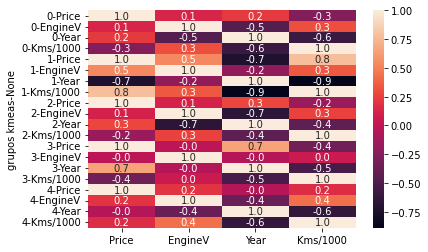

In [240]:
plt.figure(figsize=(6,4))
sns.heatmap(df.groupby('grupos kmeas').corr(method = 'pearson'),
            annot=True, fmt=".1f");

In [241]:
silhouette_score(df[['Price','Year']],kmeans_labels)

0.6381784469699981

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: O algoritmo que mais se aproximou de um bom resultado foi Kmeans. O algoritmo de regressão linear obteve resultados muito baixos.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio: